Honour Code I Robyn Smith, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [69]:
train = pd.read_csv('training.csv', index_col=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95662 entries, TransactionId_76871 to TransactionId_35670
Data columns (total 15 columns):
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 11.7+ MB


In [68]:
df_test = pd.read_csv('test.csv', index_col=0)
df_test.head()

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
TransactionId,,,,,,,,,,,,,,
TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [70]:
df_train = train.drop('FraudResult', axis=1)
df_train.head()

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
TransactionId,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2
TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2
TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2
TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2


In [71]:
target_var = train['FraudResult']
target_var

TransactionId
TransactionId_76871     0
TransactionId_73770     0
TransactionId_26203     0
TransactionId_380       0
TransactionId_28195     0
TransactionId_23223     0
TransactionId_118063    0
TransactionId_100640    0
TransactionId_51905     0
TransactionId_130161    0
TransactionId_51800     0
TransactionId_33857     0
TransactionId_94963     0
TransactionId_104687    0
TransactionId_86903     0
TransactionId_118831    0
TransactionId_122975    0
TransactionId_98367     0
TransactionId_64044     0
TransactionId_119821    0
TransactionId_94363     0
TransactionId_93543     0
TransactionId_138139    0
TransactionId_79885     0
TransactionId_127132    0
TransactionId_74649     0
TransactionId_7396      0
TransactionId_126754    0
TransactionId_136360    0
TransactionId_89705     0
                       ..
TransactionId_70563     0
TransactionId_66516     0
TransactionId_5394      0
TransactionId_11513     0
TransactionId_112982    0
TransactionId_53307     0
TransactionId_20690     

In [72]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = round((df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)*100,3)
missing = pd.concat([total, percent], axis=1, keys=['Total Nulls', 'Percentage (%)'])
missing.head(30)

,Total Nulls,Percentage (%)
PricingStrategy,0,0.0
TransactionStartTime,0,0.0
Value,0,0.0
Amount,0,0.0
ChannelId,0,0.0
ProductCategory,0,0.0
ProductId,0,0.0
ProviderId,0,0.0
CountryCode,0,0.0
CurrencyCode,0,0.0


In [73]:
train_sub = train.sample(frac=0.25, random_state=0)
train_sub.shape

(23916, 15)

In [22]:
df_train.shape

(95662, 14)

Text(0.5, 1.0, 'Fraud result before normalisation')

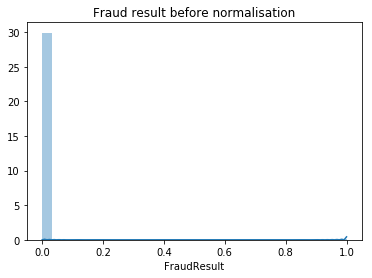

In [23]:
sns.distplot(target_var, bins = 30, )
plt.title('Fraud result before normalisation')

In [8]:
df_train['Amount'] = StandardScaler().fit_transform(df_train['Amount'].reshape(-1, 1))
df_train['Value'] = StandardScaler().fit_transform(df_train['Value'].reshape(-1, 1))

AttributeError: 'Series' object has no attribute 'reshape'

In [9]:
df_test['Amount'] = StandardScaler().fit_transform(df_test['Amount'].reshape(-1, 1))
df_test['Value'] = StandardScaler().fit_transform(df_test['Value'].reshape(-1, 1))

AttributeError: 'Series' object has no attribute 'reshape'

In [24]:
#fraud vs. normal transactions 
counts = target_var.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 95469 non-fraudulent transactions (99.798%) and 193 fraudulent transactions (0.202%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

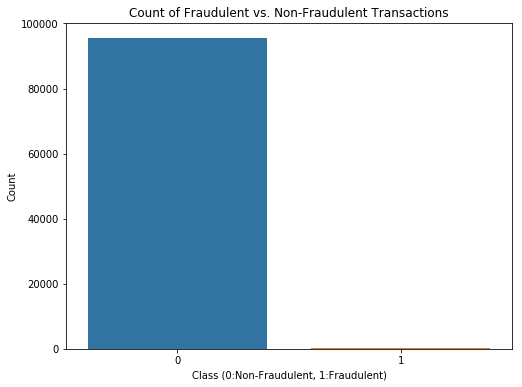

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [46]:
X_train_sub = train_sub.drop('FraudResult', axis=1)
X_train_sub

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
TransactionId,,,,,,,,,,,,,,
TransactionId_91392,BatchId_117569,AccountId_834,SubscriptionId_3759,CustomerId_1179,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_3,2000.0,2000,2019-01-23T11:50:31Z,4
TransactionId_119416,BatchId_24161,AccountId_4127,SubscriptionId_4240,CustomerId_4579,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1110.0,1110,2019-01-19T17:11:53Z,2
TransactionId_124012,BatchId_51521,AccountId_190,SubscriptionId_1897,CustomerId_513,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,2000.0,2000,2018-11-22T06:34:07Z,2
TransactionId_12251,BatchId_126898,AccountId_4840,SubscriptionId_3829,CustomerId_3212,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-01T17:45:07Z,2
TransactionId_27059,BatchId_17843,AccountId_1579,SubscriptionId_821,CustomerId_1956,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-01-15T12:21:53Z,2
TransactionId_93103,BatchId_88125,AccountId_4841,SubscriptionId_3829,CustomerId_1242,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-496.0,496,2018-11-23T15:29:46Z,2
TransactionId_58693,BatchId_58252,AccountId_1616,SubscriptionId_4410,CustomerId_1995,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,1500.0,1500,2018-11-24T10:44:27Z,2
TransactionId_42012,BatchId_53260,AccountId_3872,SubscriptionId_2177,CustomerId_4318,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,7000.0,7000,2019-01-25T12:05:23Z,2
TransactionId_120325,BatchId_93593,AccountId_299,SubscriptionId_4090,CustomerId_627,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2018-11-22T06:23:43Z,2


In [74]:
y_train_sub = train_sub['FraudResult']
y_train_sub.head()

TransactionId
TransactionId_91392     0
TransactionId_119416    0
TransactionId_124012    0
TransactionId_12251     0
TransactionId_27059     0
Name: FraudResult, dtype: int64

In [75]:
df_train['TransactionStart'] = pd.to_datetime(pd.Series(df_train['TransactionStartTime']))
df_train = df_train.drop('TransactionStartTime', axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95662 entries, TransactionId_76871 to TransactionId_35670
Data columns (total 14 columns):
BatchId             95662 non-null object
AccountId           95662 non-null object
SubscriptionId      95662 non-null object
CustomerId          95662 non-null object
CurrencyCode        95662 non-null object
CountryCode         95662 non-null int64
ProviderId          95662 non-null object
ProductId           95662 non-null object
ProductCategory     95662 non-null object
ChannelId           95662 non-null object
Amount              95662 non-null float64
Value               95662 non-null int64
PricingStrategy     95662 non-null int64
TransactionStart    95662 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(9)
memory usage: 13.4+ MB


In [76]:
df_train['Year'] = df_train['TransactionStart'].apply(lambda x: int(str(x)[:4]))
df_train['Month'] = df_train['TransactionStart'].apply(lambda x: int(str(x)[5:7]))
df_train['Day'] = df_train['TransactionStart'].dt.day
#df_train['Hour'] = df_train['TransactionStart'].dt.hour
df_train = df_train.drop('TransactionStart', axis=1)
#df_train = df_train.drop('Time', axis=1)
df_train.head()

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,Year,Month,Day
TransactionId,,,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,2018,11,15
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,2018,11,15
TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,2018,11,15
TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,2018,11,15
TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,2018,11,15


In [77]:
df_test['TransactionStart'] = pd.to_datetime(pd.Series(df_test['TransactionStartTime']))
df_test = df_test.drop('TransactionStartTime', axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45019 entries, TransactionId_50600 to TransactionId_45927
Data columns (total 14 columns):
BatchId             45019 non-null object
AccountId           45019 non-null object
SubscriptionId      45019 non-null object
CustomerId          45019 non-null object
CurrencyCode        45019 non-null object
CountryCode         45019 non-null int64
ProviderId          45019 non-null object
ProductId           45019 non-null object
ProductCategory     45019 non-null object
ChannelId           45019 non-null object
Amount              45019 non-null float64
Value               45019 non-null int64
PricingStrategy     45019 non-null int64
TransactionStart    45019 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(9)
memory usage: 5.2+ MB


In [78]:
df_test['Year'] = df_test['TransactionStart'].apply(lambda x: int(str(x)[:4]))
df_test['Month'] = df_test['TransactionStart'].apply(lambda x: int(str(x)[5:7]))
df_test['Day'] = df_test['TransactionStart'].dt.day
#df_train['Hour'] = df_test['TransactionStart'].dt.hour
df_test = df_test.drop('TransactionStart', axis=1)
#df_test = df_test.drop('Time', axis=1)
df_test.head()

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,Year,Month,Day
TransactionId,,,,,,,,,,,,,,,,
TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,4,2019,2,13
TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2,2019,2,13
TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2,2019,2,13
TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,4,2019,2,13
TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2,2019,2,13


In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45019 entries, TransactionId_50600 to TransactionId_45927
Data columns (total 16 columns):
BatchId            45019 non-null object
AccountId          45019 non-null object
SubscriptionId     45019 non-null object
CustomerId         45019 non-null object
CurrencyCode       45019 non-null object
CountryCode        45019 non-null int64
ProviderId         45019 non-null object
ProductId          45019 non-null object
ProductCategory    45019 non-null object
ChannelId          45019 non-null object
Amount             45019 non-null float64
Value              45019 non-null int64
PricingStrategy    45019 non-null int64
Year               45019 non-null int64
Month              45019 non-null int64
Day                45019 non-null int64
dtypes: float64(1), int64(6), object(9)
memory usage: 5.8+ MB


In [98]:
features = list(df_train.columns[1:])    
print(features)

['AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'PricingStrategy', 'Year', 'Month', 'Day']


In [80]:
for f in df_train.columns:
    if df_train[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_train[f].values) + list(df_test[f]))
        df_train[f] = lbl.transform(list(df_train[f].values))
        df_test[f] = lbl.transform(list(df_test[f].values))

BatchId
AccountId
SubscriptionId
CustomerId
CurrencyCode
ProviderId
ProductId
ProductCategory
ChannelId


In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95662 entries, TransactionId_76871 to TransactionId_35670
Data columns (total 16 columns):
BatchId            95662 non-null int64
AccountId          95662 non-null int64
SubscriptionId     95662 non-null int64
CustomerId         95662 non-null int64
CurrencyCode       95662 non-null int64
CountryCode        95662 non-null int64
ProviderId         95662 non-null int64
ProductId          95662 non-null int64
ProductCategory    95662 non-null int64
ChannelId          95662 non-null int64
Amount             95662 non-null float64
Value              95662 non-null int64
PricingStrategy    95662 non-null int64
Year               95662 non-null int64
Month              95662 non-null int64
Day                95662 non-null int64
dtypes: float64(1), int64(15)
memory usage: 14.9+ MB


In [82]:
xgb_model = xgb.XGBClassifier()

In [84]:
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05],
              'max_depth': [2],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [10000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [85]:
y_train = pd.DataFrame(target_var)
y_train.astype(int)

,FraudResult
TransactionId,
TransactionId_76871,0
TransactionId_73770,0
TransactionId_26203,0
TransactionId_380,0
TransactionId_28195,0
TransactionId_23223,0
TransactionId_118063,0
TransactionId_100640,0
TransactionId_51905,0


In [86]:
y_train = target_var.ravel()

In [89]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(df_train, y_train)

In [90]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5,
                   cv=StratifiedKFold(  n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [104]:
clf.fit(df_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  4.4min remaining:  6.6min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  4.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['binary:logistic'], 'learning_rate': [0.05], 'max_depth': [2], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8], 'colsample_bytree': [0.7], 'n_estimators': [10000], 'missing': [-999], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [29]:
rl_model = LogisticRegression(class_weight = 'balanced')

In [30]:
parameters1= {'C':[0.001, 0.1,0.01,1,4,5,10,20,25],'max_iter':[50,100,150,500,5000]}

In [31]:
rl = GridSearchCV(rl_model, parameters1, n_jobs=5, 
                   cv=StratifiedKFold(  n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [32]:
rl.fit(df_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   43.3s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  4.3min
[Parallel(n_jobs=5)]: Done 225 out of 225 | elapsed:  6.6min finished
C:\Users\smith\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'C': [0.001, 0.1, 0.01, 1, 4, 5, 10, 20, 25], 'max_iter': [50, 100, 150, 500, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [33]:
predictions2 = rl.predict(df_test)
predictions2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45019 entries, TransactionId_50600 to TransactionId_45927
Data columns (total 16 columns):
BatchId            45019 non-null int64
AccountId          45019 non-null int64
SubscriptionId     45019 non-null int64
CustomerId         45019 non-null int64
CurrencyCode       45019 non-null int64
CountryCode        45019 non-null int64
ProviderId         45019 non-null int64
ProductId          45019 non-null int64
ProductCategory    45019 non-null int64
ChannelId          45019 non-null int64
Amount             45019 non-null float64
Value              45019 non-null int64
PricingStrategy    45019 non-null int64
Year               45019 non-null int64
Month              45019 non-null int64
Day                45019 non-null int64
dtypes: float64(1), int64(15)
memory usage: 5.8+ MB


In [105]:
predictions = clf.predict(df_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
#preds_avg=(predictions2+predictions)/2
Robyn = pd.DataFrame({'TransactionId': df_test.index, 'FraudResult': predictions})
Robyn.to_csv('submission_Final.csv', index=False)

In [199]:
Robyn

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0
5,TransactionId_134338,0
6,TransactionId_109096,0
7,TransactionId_14249,0
8,TransactionId_69896,0
9,TransactionId_91468,0


In [163]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,TransactionId,FraudResult
0,TransactionId_50600,NaN
1,TransactionId_95109,NaN
2,TransactionId_47357,NaN
3,TransactionId_28185,NaN
4,TransactionId_22140,NaN
